In [17]:
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from ipywidgets import interact

In [18]:
N = 100
r = 3.52

In [19]:
def conTructSeq(r,x0):
    a = []
    b = []
    for i in range(N):
        a.append(x0)
        b.append(i)
        x0 = r * (1-x0) * x0
    A = np.array(a)
    B = np.array(b)
    return A, B
def plotScatter(r,x0):
    plt.figure(figsize=(8,4))
    A, B = conTructSeq(r,x0)
    plt.title("r = " + str(r))
    plt.scatter(B,A, color = "red", alpha=1, s= 5)
    plt.show()

In [52]:
def plotLine(r,x0):
    plt.figure(figsize=(8,4))
    A, B = conTructSeq(r,x0)
    plt.title("r = " + str(r))
    plt.plot(B,A, color = "red", alpha=0.8)
    plt.scatter(B,A, color = "blue", alpha=1, s= 10)
    plt.show()

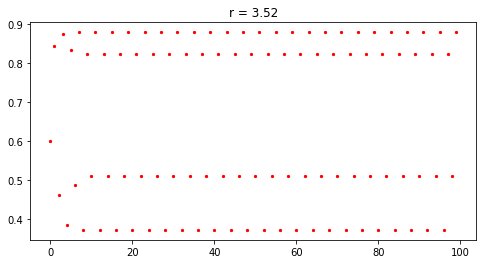

In [53]:
plotScatter(r,0.6)

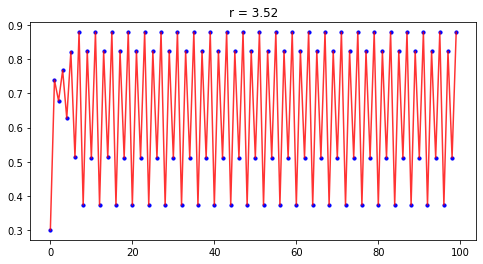

In [54]:
plotLine(r,0.3)

In [60]:
@interact(r=(0,4,0.01), x0=(0, 1, 0.01), N=(20,2000,10))
def myplotLine(r = 3, x0 = 0.3, N = 20):
    x = []
    y = []
    x.append(x0)
    y.append(0)
    plt.figure(figsize=(12,4))

    
    for i in range(1,N+1):
        t = r * x[-1] * (1 - x[-1])
        x.append(t)
        y.append(i)
        
    X = np.array(x)
    Y = np.array(y)
    
    plt.plot(Y,X, color = "red", alpha=0.8)
    plt.scatter(Y,X, color = "blue", alpha=1, s= 10)
    
    plt.title("r = " + str(r),fontsize = 20)
    plt.ylim([0,1])
    plt.xlabel("n",fontsize = 20)
    plt.ylabel("$x_n$",fontsize = 20)
    plt.show()

interactive(children=(FloatSlider(value=3.0, description='r', max=4.0, step=0.01), FloatSlider(value=0.3, desc…

In [61]:
@interact(r=(0,4,0.01), x0=(0, 1, 0.01), N=(20,2000,10))
def myplot(r = 3, x0 = 0.3, N = 20):
    x = x0
    plt.figure(figsize=(12,4))
    plt.plot(0, x, "bo")
    
    for i in range(1,N+1):
        x = r * x * (1 - x)
        plt.plot(i, x,"bo")

    plt.title("r = " + str(r),fontsize = 20)
    plt.ylim([0,1])
    plt.xlabel("n",fontsize = 20)
    plt.ylabel("$x_n$",fontsize = 20)
    plt.show()

interactive(children=(FloatSlider(value=3.0, description='r', max=4.0, step=0.01), FloatSlider(value=0.3, desc…

In [30]:
@interact(r=(0,4,0.01), x0=(0, 1, 0.01), N=(10,2000,10))
def cobweb(r = 3, x0 = 0.3, N = 10):
    plt.figure(figsize=(9,9))
    xold = x0
    myx = np.linspace(0,1,100)
    plt.plot(myx, r * myx * (1 - myx))
    plt.plot(myx, myx)

    for i in range(1,N+1):
        x = r * xold * (1 - xold)
        plt.plot([xold,xold,x], [xold,x,x],"r-")
        xold = x

    plt.title("r = " + str(r),fontsize = 20)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("$x_i$",fontsize = 20)
    plt.ylabel("$x_{i+1}$",fontsize = 20)
    plt.show()

interactive(children=(FloatSlider(value=3.0, description='r', max=4.0, step=0.01), FloatSlider(value=0.3, desc…

In [42]:
@interact(r_min=(2,4,0.001),r_max=(2,4,0.001))
def bifurcation_diagram(r_min=2, r_max=4.0 ):
    num_r = 1000
    N_min = 1400
    N = 1500
    rspace = np.linspace(r_min, r_max, num_r)
    x = 0.3
    plt.figure(figsize=(15,9))
    
    for r in rspace:
        pltset = []
        
        for i in range(1,N+1):
            x = r * x * (1 - x)
            if i > N_min:
                pltset.append(x)
    
        plt.plot(np.zeros_like(pltset)+r, pltset,"r,")
    plt.xlabel("r ",fontsize = 20)
    plt.ylabel("$x_n$",fontsize = 20)
    plt.show()

interactive(children=(FloatSlider(value=2.0, description='r_min', max=4.0, min=2.0, step=0.001), FloatSlider(v…

In [41]:
@interact(r_min=(2,4,0.001),r_max=(2,4,0.001), x_min=(0,1,0.001), x_max=(0,1,0.001))
def bifurcation_diagram(r_min=2, r_max=4.0, x_min=0, x_max=1):
    plt.figure(figsize=(15,9))
    num_r = 1000
    N_min = 5000
    N_max = 8000
    N = 50
    rspace = np.linspace(r_min, r_max, num_r)
    x = 0.3
    pltset = []
    rset = []
    
    for r in rspace:
        count = 0
        for i in range(N_max):
            x = r * x * (1 - x)
            if i > N_min and x_min < x < x_max:
                count += 1
                pltset.append(x)
                rset.append(r)
                if count > N:
                    break
    
    plt.plot(rset, pltset, marker=",", color="r",lw=0)
    plt.show()

interactive(children=(FloatSlider(value=2.0, description='r_min', max=4.0, min=2.0, step=0.001), FloatSlider(v…